In [3]:
#Import cluster algorithms
from sklearn.cluster import KMeans, DBSCAN

#Import classifiers
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

#Import libraries to deal with data
import numpy as np
import pandas as pd
import pickle


#Process data libraries
from skimage import io
from scipy import signal
import pylab, wave
from scipy.io import wavfile

#Miscelanous
import math
import time
import os
import warnings


#Graphs and show images
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches



np.random.seed(10)
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')
%matplotlib inline 


In [4]:
##############################################
#                                            #
#                Spectrogram                 #
#                                            #
##############################################
#Function to retrieve data from wav files
def wavInfo(rec_file):
    sample_rate, samples = wavfile.read(rec_file)
    channels  = wave.open(rec_file, 'r').getnchannels()
    return sample_rate, samples, channels


#Function to calcualte spectrogram
def specInfo(rec_file):
    sampleRate, samples, channels = wavInfo(rec_file)
    
    #Solution for one channels
    if(channels == 1):
        freqs, t, spectrum  = signal.spectrogram(samples[:], nfft=512, window="hann", fs=sampleRate)
        
    #Solution for two channels
    elif(channels == 2):
        freqs, t, spectrum = signal.spectrogram(samples[:, 1], nfft=512, window="hann", fs=sampleRate)
        
        spectrum = spectrum.astype("float64") 
    return t,freqs,spectrum

##############################################
#                                            #
#              Image/Plotting                #
#                                            #
##############################################
def plotModSpecSimple(times, freqs, specMod, figsize = (8,4), xlab = "", ylab = "", title = "", colorbar = True, patch = None, cmap = "Purples"):
    """ 
        Function to plotspectrograms and bounding boxes in spectrograms
        Input:
            times - np array containing time steps (shape X,1)
            freqs - np array containing frequency steps (shape Y,1)
            specMod - np array containing magnitude values on each time step for each frequency (shape - (Y,X))
            figsize - list containing width and height size for the figure
            xlab - string containining label for x axis
            ylab - string contaiing label for y axis
            title - string containing title for the graph
            colorbar - bool value to decide whether graph should contain colorbar graph or not
            patch - array containing matplotlib.patches to be applied to the plot
            cmap - cmap for color displaying
    """
    
    
    fig, ax = pylab.subplots(1,1, figsize = figsize)
    ax.set_facecolor("grey")
    im = ax.pcolormesh(times, freqs,(specMod), cmap= cmap)
    
    #Plot spectrogram information given
    ax.pcolormesh(times, freqs,(specMod), cmap= cmap)
    
    #Add all patches to figure, if any
    if (patch !=None ):
        for i in patch:
            ax.add_patch(i)
    
    #Set x axis label
    ax.set_xlabel(xlab)
    
    #Set y axis label
    ax.set_ylabel(ylab)
    
    #Set title label
    ax.set_title(title)
    
    #Set colorbar if wanted
    if(colorbar):
        fig.colorbar(im, ax=ax)
    
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# def visualizeTraining(data, num):
    
#     for i in range(num):
#         startPT = time.time()
#         file = data['archivo'][i]
#         minf = data['freqme'][i]
#         maxf = data['freqma'][i]
#         startT = data['tiempoi'][i]
#         endT = data['tiempof'][i]
#         t, freq,spec, t2,freq2,spec2 = getMarca(file, minf,maxf, startT,endT)
        
#         #Cluster noise
#         clusters = 4
#         kCluster = KMeans(clusters)
#         flatSpectrum = spec2.flatten().reshape(-1,1)
#         res = kCluster.fit_predict(flatSpectrum)
#         res = orderClusters(res, flatSpectrum, clusters)
        
    
#         #Set all values other than 0 to 1 
#         correctingIdx = np.where(res != 0)[0]
#         res = np.zeros(flatSpectrum.shape)
#         res[correctingIdx] = 1
#         res = res.reshape(spec2.shape)
        
#         trainMatrix = np.zeros((freq.shape[0], 1000))
#         for i in range(res.shape[0]):
#             trainMatrix[i][:res.shape[1]]= res[i]

#         endPT = time.time()
#         print(endPT - startPT, data['especie_id'][i])
# #         disk = morphology.disk(1)
# #         plotModSpecSimple(t,freq,morphology.erosion((trainMatrix), disk))
# #         disk = morphology.disk(1.4)
        
# #         plotModSpecSimple(t,freq,morphology.dilation((trainMatrix), disk))
#         plotModSpecSimple(t,freq,trainMatrix)
    

##############################################
#                                            #
#              Data processing               #
#                                            #
##############################################



def Filter(array, Min, Max):
    '''Given a Min or Max parameter, find the index in the array that corresponds to the given Min or Max value
    #Example  [1,4,7,11], Min:5, Max 8, Output = (1,3)
    Input: 
        array: nparray containing information
        min  : float containing the minimum value to be found in array
        max  : float containing the maximum value to be found in array
    '''
    try:
        Min = (np.abs(array-Min)).argmin()
        Max = (np.abs(array-Max)).argmin()+1
    
        return Min, Max
    
    except:
        print("error: array input is not an nparray")
        
        
# def getMarca(path = "", file, minf, maxf, startT, endT, timeSize = 1000, freqSize = 100):
#     ''' 
#     '''
#     path = "Audio/Experimental/dataset/trainMarcas/"
#     t,freq,spec = specInfo(path + file)
    
#     #Find index of the time in the array 
#     startI = (np.abs(t - startT)).argmin()
#     endI = (np.abs(t - endT)).argmin()
    
#     #Find index of the frequencies in the array
#     mifreqI = (np.abs(freq - minf)).argmin()
#     mafreqI = (np.abs(freq - maxf)).argmin()
    
#     t2 = t[startI:endI]
#     freq2 = freq[mifreqI:mafreqI]
    
#     mags = [spec[mifreqI][startI:endI]]
    
#     for i in range(mifreqI+1, mafreqI):
#         mags = mags + [spec[i][startI:endI]]  
#     spec2 = np.array(mags)
#     return t[0:timeSize], freq[0:freqSize], spec, t2, freq2, spec2


def getMarcaFromSpectrogram(t, freq, spec, minf, maxf, startT, endT, timeIndex):
    
    #Find index of the time in the array 
    startI, endI= Filter(t, startT, endT)
    
    #ind index of the frequencies in the array    
    minfreqI, maxfreqI = Filter(freq, minf, maxf)
    
    
    tSelect = t[startI:endI]
    freqSelect = freq[minfreqI:maxfreqI]
    if endI - startI > timeIndex:
        endI = startI+timeIndex
        
    mags = [spec[minfreqI][startI:endI]]
        
    for i in range(minfreqI+1, maxfreqI):
        mags = mags + [spec[i][startI:endI]]  
    specSelect = np.array(mags)
    
    return tSelect, freqSelect, specSelect, minfreqI, maxfreqI

# def transformDataset(dataset, startFreqIndex, endFreqIndex):
#     load = []
#     labels = []
#     failed = []
#     clusters = 4
#     kCluster = KMeans(clusters)
    
#     path = "../../dataset2/audios/"
            
#     groupByFile = dataset.groupby("archivo")

#     ctr = 0
#     for eachFile in groupByFile:
#         if ctr % 100 == 0 :
#             print(ctr,"of",  len(groupByFile))
#         ctr+=1
#         file = eachFile[0]
#         t,freq, spec = specInfo(path + file)
#         for idx, data in eachFile[1].iterrows():
#             try:

#                 minf = data['freqme']
#                 maxf = data['freqma']
#                 startT = data['tiempoi']
#                 endT = data['tiempof']

#                 freq2, spec2 = getMarcaFromSpectrogram(t,freq,spec, minf,maxf, startT,endT)
                
# #                 scalar = StandardScaler().fit(spec2)
# #                 spec3 = scalar.transform(spec2)

#                 #Cluster noise

#                 flatSpectrum = spec2.flatten().reshape(-1,1)
#                 res = kCluster.fit_predict(flatSpectrum)
#                 res = orderClusters(res, flatSpectrum, clusters)


#                 #Set all values other than 0 to 1 
#                 correctingIdx = np.where(res != 0)[0]
#                 res = np.zeros(flatSpectrum.shape)
#                 res[correctingIdx] = 1
#                 res = res.reshape(spec2.shape)

#                 trainMatrix = np.zeros((endFreqIndex-startFreqIndex, 1000))
#                 for i in range(res.shape[0]):
#                     trainMatrix[i][:res.shape[1]]= res[i]
#                 load.append(trainMatrix.flatten())
#                 labels.append(data['especie_id'])
                
#             except Exception as e:
#                 failed.append(idx)
#                 print("failed: ", idx)
#                 print(e, "\n\n")
#     labels = np.array(labels)
#     load = np.array(load)
    
#     #/order by species id
#     idx = np.argsort(labels)
#     load[:] = load[idx]
#     labels[:] = labels[idx]

#     return load, labels

# def transformDataset2(dataset, timeIndex, freqIndex, especieCounter):
#     DBScan2 = DBSCAN(2,8)

#     load = []
#     labels = []
#     failed = []
#     clusters = 6
#     kCluster = KMeans(clusters)
#     trainMatrix = np.zeros((freqIndex, timeIndex), dtype = "int8")
#     path = "../../dataset2/audios/"
    
#     groupByFile = dataset.groupby("archivo")

#     fctr = 0
#     for eachFile in groupByFile:
#         if fctr % 100 == 0 :
#             print(fctr,"of",  len(groupByFile))
#         fctr+=1
#         file = eachFile[0]
#         t,freq, spec = specInfo(path + file)
#         for idx, data in eachFile[1].iterrows():
#             try:

#                 minf = data['freqme']
#                 maxf = data['freqma']
#                 startT = data['tiempoi']
#                 endT = data['tiempof']

#                 t2, freq2, spec2, minFreq = getMarcaFromSpectrogram(t,freq,spec, minf,maxf, startT,endT, timeIndex=timeIndex)
                


#                 #Cluster noise

#                 flatSpectrum = spec2.flatten().reshape(-1,1)
#                 res = kCluster.fit_predict(flatSpectrum)
#                 res = orderClusters(res, flatSpectrum, clusters)


#                 #Set all values other than 0 to 1 
#                 correctingIdx = np.where(res != 0)[0]
#                 res = np.zeros(flatSpectrum.shape)
#                 res[correctingIdx] = 1
# #                 res = res.reshape(spec2.shape)

# #                 finalMatrix = np.zeros((endFreqIndex-startFreqIndex, 1000))
# #                 for i in range(res.shape[0]):
# #                     finalMatrix[i][:res.shape[1]]= res[i]
                    
                    
#                 coordArray = []
#                 for i in range(len(res)):
#                     if res[i]==1:

#                         lennum = spec2.shape[1]
#                 #         print(i, res[i], i%spec2.shape[1], int(i/spec2.shape[1]))
#                         col = i%lennum
#                         row = int(i/lennum)
#                         coordArray.append([row,col])
#                 coordArray = np.array(coordArray)

#                 speeches= DBScan2.fit_predict(coordArray)
#         #         print("Processing time: ", time.time()- begin)
#                 minIndex = np.min(speeches)
#                 maxIndex = np.max(speeches)

#                 if(minIndex == -1):
#                     minIdex = 0 ;
#                 for speechValue in range(0, maxIndex+1):
#                     trainMatrix[:,:] = 0

#                     speechIndexes = np.where(speeches == speechValue)[0]

#                     minVal = np.min(coordArray[speechIndexes], axis = 0)[1]
#                     for ctr, i in enumerate(coordArray[speechIndexes]):
#                         if i[1] - minVal < timeIndex:
#                             trainMatrix[int(i[0])+ minFreq][ int(i[1]-minVal)] =1
                    
                    
#                     especieCounter[data['especie_id']]+=1
#                     load.append(trainMatrix.flatten())
#                     labels.append(data['especie_id'])
                
#             except Exception as e:
#                 failed.append(idx)
#                 print("failed: ", idx)
#                 print(e, "\n\n")
#     labels = np.array(labels)
#     load = np.array(load)
    
#     #/order by species id
#     idx = np.argsort(labels)
#     load[:] = load[idx]
#     labels[:] = labels[idx]

#     return load, labels, especieCounter

def newSlicing(array, lowerIdx, upperIdx, step):
    resultingArray = np.array(array[lowerIdx:upperIdx])
    for i in range(upperIdx,len(array)+1,step):
        lowerIdx += step
        upperIdx+= step
        resultingArray = np.concatenate([resultingArray, array[lowerIdx:upperIdx]])

    return resultingArray

def orderClusters(flatCluster, flatSpectrogram, num, getGroups = False ):
    """Function to order the clusters according to the magnitude values
       Returns a vector containing the indeces of each cluster, where the 
       indeces identify which cluster is stronger in terms of magnitude(relative to spectrum)
    
       Input:
           flatCluster: Array containing flattened spectrogram's shape with cluster entries
           flatSpectrogram
    """
    
    minS = [None]*num
    maxS = [None]*num
    smallVal = np.array([])
    
    #
    for i in range(num):
        #identify each cluster
        idx = np.where(flatCluster ==i )
        
        #Find min and max values of each cluster
        minS[i] = min(flatSpectrogram[idx])
        maxS[i] = max(flatSpectrogram[idx])
        
        #Store the min value, so we can order the clusters according to the corresponding value
        smallVal = np.append(smallVal, minS[i])
        
    #Create buffer that will contain the cluster identifier information
    returnCluster = np.zeros(flatCluster.shape)
    
    #Fill the buffer containing the cluster identifier in ordered shape (min to max)
    for ctr, i in enumerate(np.argsort(smallVal)):
        idx = np.where(flatCluster == i)
        returnCluster[idx] = ctr
        

    del minS, smallVal, idx
    if getGroups:
        return returnCluster,maxS
    return returnCluster


#MISC

class Error(Exception):
    """Base class for exceptions in this module."""
    
    pass

Spectrogram calculation time: 0.33091306686401367 seconds


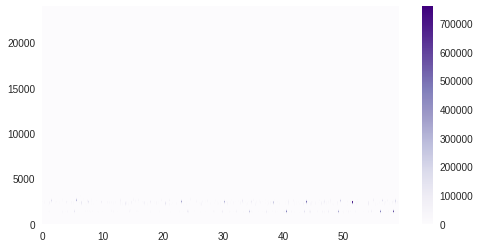

In [5]:
#audio file path
path = "03-10-3022_00_38.wav"

#Get spectrogram data
calculateSpecT = time.time()
t,freq,spec = specInfo(path)
print("Spectrogram calculation time:", time.time()- calculateSpecT, "seconds")#outputs spectrogram calculation time
#Plot spectrogram data
plotModSpecSimple(t,freq,spec)

In [6]:
dataDescription = pd.read_csv("marcasArticulo.csv") 
dataDescription.head()

,marca_id,grabacion_id,archivo,punto_id,especie_id,tiempoi,tiempof,freqme,freqma,maxpot
0,52.0,14.0,03-10-3022_30_38.wav,4.0,1.0,10.024,10.340,1174.3,2495.4,120.3
1,53.0,14.0,03-10-3022_30_38.wav,4.0,1.0,25.152,25.550,1229.4,2623.9,127.1
2,54.0,14.0,03-10-3022_30_38.wav,4.0,1.0,46.038,46.447,1211.0,2844.0,123.5
3,6076.0,14.0,03-10-3022_30_38.wav,4.0,7.0,42.436,42.864,3694.9,4117.6,87.4
4,31978.0,25.0,03-10-3104_00_35.wav,4.0,1.0,2.809,3.192,1266.1,2770.6,110.1


In [7]:
MarkIndex = 0
file = dataDescription['archivo'][MarkIndex]
minimumFrequency = dataDescription['freqme'][MarkIndex]
maximumFreqeuency = dataDescription['freqma'][MarkIndex]
startTime = dataDescription['tiempoi'][MarkIndex]
endTime = dataDescription['tiempof'][MarkIndex]

#Set a default value for Duration of mark 
durationTime = 460

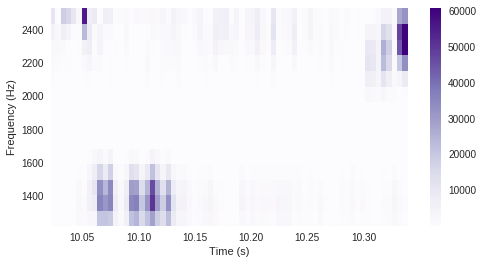

In [8]:
#Get spectrogram information of mark
tSelect, freqSelect, specSelect, minFreq, maxFreq = getMarcaFromSpectrogram(t,freq,spec, minimumFrequency,maximumFreqeuency, startTime,endTime, durationTime)

#Plot the mark
plotModSpecSimple(tSelect, freqSelect, specSelect, ylab = "Frequency (Hz)", xlab = "Time (s)")

In [9]:
#Define clusters and kmeans cluster instace
clusters = 6
kCluster = KMeans(clusters)

#First we must flatten the data to cluster it (1 dimensional vector)
specSelectFlatten = specSelect.flatten().reshape(-1,1)

Y axis in this plot is a density proportion of the count for each bin in magnitude values


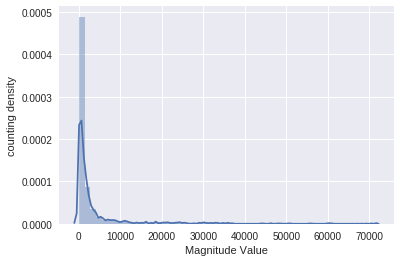

In [10]:
#Plot a histogram of magnitude values
ax = sns.distplot(specSelectFlatten, hist = True, norm_hist=False, axlabel= "Magnitude Value")
ax.set_ylabel("counting density")
print("Y axis in this plot is a density proportion of the count for each bin in magnitude values")

In [11]:

#Cluster the magnitude values
#The returning vector will contain the cluster group associated to each entry 
specSelectFlattenCluster = kCluster.fit_predict(specSelectFlatten)

In [12]:
#Make sure we order labels based on cluster's magnitude
specSelectFlattenCluster, clusterMax = orderClusters(specSelectFlattenCluster, specSelectFlatten, clusters,  True)

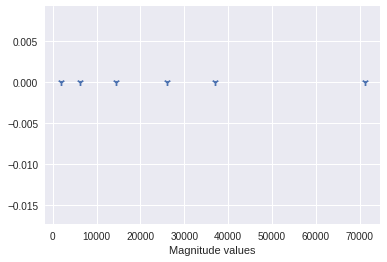

In [13]:
#Representation of clusters, between each marker is a cluster group
plt.scatter(np.concatenate(clusterMax), [[0]*clusters], marker = "1")
plt.xlabel("Magnitude values")


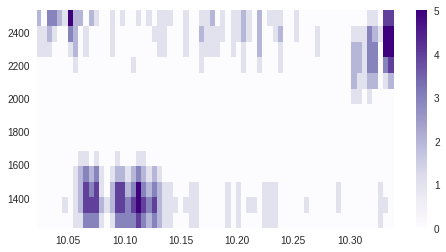

In [14]:
#Display how mark looks like after clutering magnitude values
plotModSpecSimple(tSelect,freqSelect , specSelectFlattenCluster.reshape(specSelect.shape))

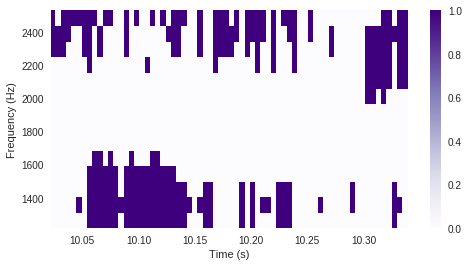

In [15]:
#Prepare data
#Set all values other than 0 to 1 
correctingIdx = np.where(specSelectFlattenCluster != 0)[0]
copySelectFlattenCluster = specSelectFlattenCluster
specSelectFlattenCluster = np.zeros(specSelectFlatten.shape)

#Set all values not equal to 0 to 1. 
specSelectFlattenCluster[correctingIdx] = 1
plotModSpecSimple(tSelect,freqSelect , specSelectFlattenCluster.reshape(specSelect.shape),  ylab = "Frequency (Hz)", xlab = "Time (s)")

In [16]:
#Get coordinates of relevant points (Coordinates of those values containing 1)
yIndeces, xIndeces = np.where(specSelectFlattenCluster.reshape(specSelect.shape) ==  1)
coordinatesArray = np.array([yIndeces, xIndeces]).T


In [17]:
#Define DBScan instace
DBScan = DBSCAN(2,8)

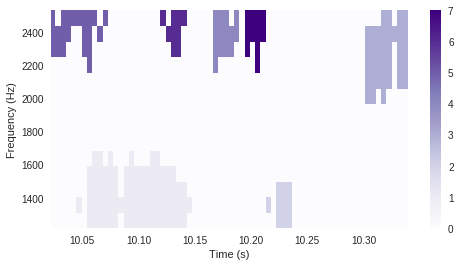

In [18]:
detectedGroups = DBScan.fit_predict(coordinatesArray)

#Get min and max groups (if min = -1, some points where not clustered) max will contain the number of cluster groups found
minIndex = np.min(detectedGroups)


#In order to have a range from 0 to 1, add abs value of minIndex ( if min index = 0 , it will remain the same
#if minIndex == -1, it will relocate range from 0 to maxIndex+1)
copySelectFlattenCluster[correctingIdx] = detectedGroups + abs(minIndex)
detectedGroups += abs(minIndex)
plotModSpecSimple(tSelect,freqSelect,copySelectFlattenCluster.reshape(specSelect.shape), xlab = "Time (s)", ylab = "Frequency (Hz)")

displayGroups = np.zeros(specSelect.shape)

for ctr, i in enumerate(coordinatesArray):
    displayGroups[int(i[0])][ int(i[1])] = detectedGroups[ctr]
maxIndex = np.max(detectedGroups)

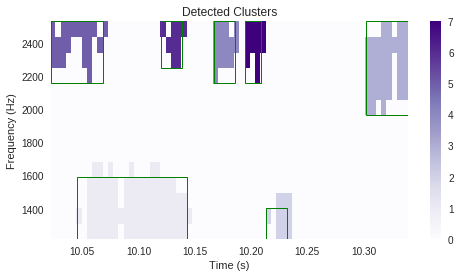

In [19]:
rect = []
for speechValue in range(1, maxIndex+1):
    if len(np.where(detectedGroups== speechValue)[0]) != 0 :
        
        #Get min and max time and frequency values of the identified cluster groups
        minf = np.min(np.where(displayGroups == speechValue)[0])
        maxf = np.max(np.where(displayGroups == speechValue)[0])
        startT = np.min(np.where(displayGroups == speechValue)[1])
        endT = np.max(np.where(displayGroups == speechValue)[1])

        #Create bounding box and add to boxes to be displayed
        rect.append(patches.Rectangle((tSelect[startT],freqSelect[minf]),tSelect[endT]-tSelect[startT],freqSelect[maxf]-freqSelect[minf],linewidth=1,edgecolor='g',facecolor='none'))

#Display marc with bounding boxes around the cluster groups found
plotModSpecSimple(tSelect,freqSelect,displayGroups, xlab = "Time (s)", ylab = "Frequency (Hz)", title = "Detected Clusters", patch = rect)


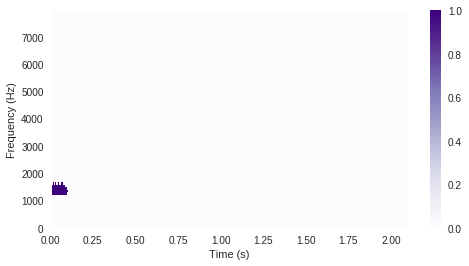

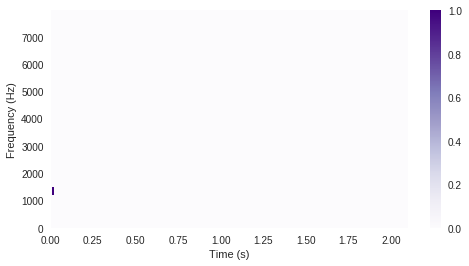

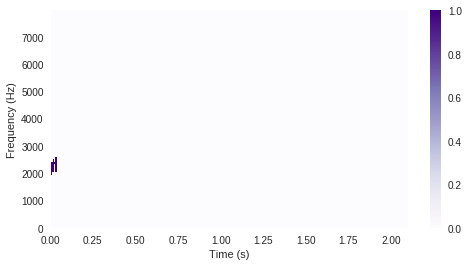

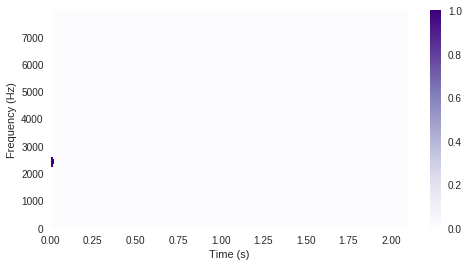

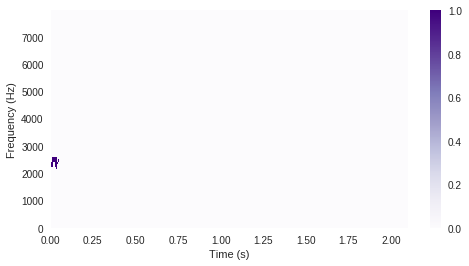

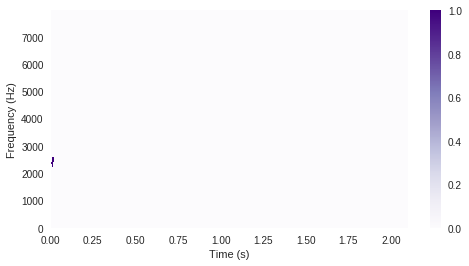

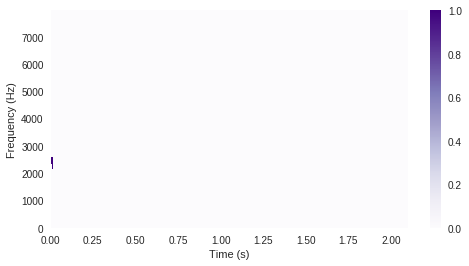

In [20]:
#Define training model parameters
#These two parameters are used to define how many time steps and frequencies will the training model have
timeInterval = 450
frequencyInterval = 86


for speechValue in range(1, maxIndex+1):
    speechIndexes = np.where(detectedGroups == speechValue)[0]

    minVal = np.min(coordinatesArray[speechIndexes], axis = 0)[1]

    trainMatrix = np.zeros((frequencyInterval ,timeInterval))

    for ctr, i in enumerate(coordinatesArray[speechIndexes]):
        if i[1] - minVal < timeInterval:
            trainMatrix[int(i[0])+minFreq][ int(i[1])-minVal] =1
    plotModSpecSimple(t[0:timeInterval], freq[0:frequencyInterval],trainMatrix, xlab = "Time (s)", ylab = "Frequency (Hz)")    

In [21]:
trainMatrix.shape

(86, 450)

In [22]:
def transformDataset2( dataset, timeIndex, freqIndex, especieCounter,  frequencyInterval =86, dbscanE = 2, dbscanMin = 8, kmeanCluster = 6, datasetPath = "../dataset2/audios/"):
    DBScan = DBSCAN(dbscanE,dbscanMin)
    markLoad = []
    markLabel = []
    markFailed = []
    kCluster = KMeans(kmeanCluster)
    trainMatrix = np.zeros((freqIndex, timeIndex), dtype = "int8")
    
        
    groupByFile = dataset.groupby("archivo")

    fctr = 0
    for eachFile in groupByFile:

        #Each file contains all the metadata ifilenformation for each file
            
        #Get file name from each file
        fileName = eachFile[0]
        
        t,freq, spec = specInfo(datasetPath + fileName)

        for idx, data in eachFile[1].iterrows():
            try:

                minimumFrequency = data['freqme']
                maximumFreqeuency = data['freqma']
                startTime = data['tiempoi']
                endTime = data['tiempof']

                tSelect, freqSelect, specSelect, minFreq, maxFreq= getMarcaFromSpectrogram(t,freq,spec, minimumFrequency,maximumFreqeuency, startTime,endTime, timeIndex)
    #                 return 0 

                #Cluster noise
                specSelectFlatten = specSelect.flatten().reshape(-1,1)

                specSelectFlattenCluster = kCluster.fit_predict(specSelectFlatten)
                specSelectFlattenCluster, clusterMax = orderClusters(specSelectFlattenCluster, specSelectFlatten, kmeanCluster,  True)


                correctingIdx = np.where(specSelectFlattenCluster != 0)[0]
                copySelectFlattenCluster = specSelectFlattenCluster
                specSelectFlattenCluster = np.zeros(specSelectFlatten.shape)

                #Set all values not equal to 0 to 1. 
                specSelectFlattenCluster[correctingIdx] = 1
                #plotModSpecSimple(tSelect,freqSelect , specSelectFlattenCluster.reshape(specSelect.shape),  ylab = "Frequency (Hz)", xlab = "Time (s)")

                #Get coordinates of relevant points (Coordinates of those values containing 1)
                yIndeces, xIndeces = np.where(specSelectFlattenCluster.reshape(specSelect.shape) ==  1)
                coordinatesArray = np.array([yIndeces, xIndeces]).T

                detectedGroups = DBScan.fit_predict(coordinatesArray)

                #Get min and max groups (if min = -1, some points where not clustered) max will contain the number of cluster groups found
                minIndex = np.min(detectedGroups)
                detectedGroups += abs(minIndex)
                maxIndex = np.max(detectedGroups)

                trainMatrix = np.zeros((frequencyInterval ,timeIndex), dtype = "int8")

                for speechValue in range(1, maxIndex+1):
                    speechIndexes = np.where(detectedGroups == speechValue)[0]

                    minVal = np.min(coordinatesArray[speechIndexes], axis = 0)[1]

                    trainMatrix[:,:] = 0

                    for ctr, i in enumerate(coordinatesArray[speechIndexes]):
                        if i[1] - minVal < timeIndex:
                            trainMatrix[int(i[0])+minFreq][ int(i[1])-minVal] =1
                #plotModSpecSimple(t[0:timeInterval], freq[0:frequencyInterval],trainMatrix, xlab = "Time (s)", ylab = "Frequency (Hz)")    

                    especieCounter[data['especie_id']]+=1
                    markLoad.append(trainMatrix)
                    markLabel.append(data['especie_id'])
            except Exception as e:
                markFailed.append(idx)
                print("Marked failed: ", idx)
                print(e, "\n\n")
    markLabel = np.array(markLabel)
    markLoad = np.array(markLoad)
    
    #/order by species id
    idx = np.argsort(markLabel)
    markLoad[:] = markLoad[idx]
    markLabel[:] = markLabel[idx]

    return markLoad, markLabel, especieCounter

In [23]:
maxFreqForInterval = 8000

dataDescription = pd.read_csv("marcasArticulo.csv") 
speciesID = dataDescription['especie_id'].unique()[:-1]#gives array of all species in csv

    #Since we are only using the 8000 frequencies and below, remove species outside the bounds ##why are we only using freqs < 8000
dataDescription = dataDescription.groupby('especie_id').filter(lambda x: max(x['freqma']) < 8000)


indexes= dataDescription.index[dataDescription['especie_id'] == 12]
dataDescription = dataDescription.drop(indexes).reset_index()
indexes= dataDescription.index[dataDescription['especie_id'] == 10]
dataDescription = dataDescription.drop(indexes).reset_index()
np.sort(dataDescription['especie_id'].unique())

maxtimeWithSTD = np.max(dataDescription.groupby('especie_id').apply(lambda x: (np.mean(x['tiempof']- x["tiempoi"]) +np.std(x['tiempof']- x["tiempoi"]))))
t,freq,spec = specInfo("../dataset2/audios/03-10-3018_00_35.wav")
# getTimeInterval = Filter(t, 0,maxtimeWithSTD)[1]
frequencyLimit = ((np.abs(freq - maxFreqForInterval)).argmin()+1)
timeLimit = ((np.abs(t - maxtimeWithSTD)).argmin()+1)


In [24]:
especieGroup = dataDescription.groupby('especie_id')

#Get especies ids and the size of "marcas" and get an index array to sort the order of species in terms
#of how many marcs they have
uniqueIDs = []
counter = []
for k,v in especieGroup.groups.items():
    uniqueIDs.append(k)
    counter.append(len(v))
idx = np.argsort(counter)
#Order the array based on "marcas" amount
uniqueIDs[:] = np.array(uniqueIDs)[idx]


especieConArchivo = dataDescription.groupby(['especie_id','archivo'])


#Contiene el nombre de todas las grabaciones usadas
grabaciones = []

#Grabaciones usadas en el training
aceptadas = []

#Diccionario que contiene el nombre de las grabaciones usadas de cada especie
grabacionName = {}
#Diccionario que contiene el counter de marcas por grabacion de cada especie
counterGrab = {}
#Diccionario para contar la cantidad de marcas que tenemos de cada especie
counterEspecie ={}
for k, v in (especieConArchivo.groups).items():
    #
    if k[0] not in grabacionName.keys():
        grabacionName[k[0]] = []
        counterGrab[k[0]] = []
        counterEspecie[k[0]] = 0 
    grabacionName[k[0]].append( k[1])
    counterGrab[k[0]].append(int(len(v)))
    if k[1] not in grabaciones:
        grabaciones.append(k[1])
    
#Ordenar las grabaciones dentro de cada especie por la cantidad de marcas que contienen
for k, v in counterGrab.items():
    sortByIndex = np.argsort(counterGrab[k])[::-1]
    #Convertir arreglos a np arrays para poder ordenarlos usando indexing (argsort)
    grabacionName[k] = np.array(grabacionName[k])
    counterGrab[k] = np.array(counterGrab[k])

    grabacionName[k][:] = grabacionName[k][sortByIndex]
    counterGrab[k][:] = counterGrab[k][sortByIndex]
    

#Buffer que contiene el minimo cantidad de marcas que queremos para training
finalCounter = 200
#El for loop irá de la especie con menos marcas a la que mas tiene 
for specie in uniqueIDs:
    #Ir por cada grabacion que tiene especie
    for ctr, grabacion in enumerate(grabacionName[specie]):

        #Verificar que la cantidad de marcas para training es mayor que "finalcounter"
        if counterEspecie[specie] < finalCounter:
            #Buscar la grabacion y la cantidad de marcas obtenidas de cada especie y añadirselo al counter
            for k,v in grabacionName.items():
                idx = np.where(v  == grabacion)[0]
                if len(idx) == 1 and grabacion in grabaciones:
                    counterEspecie[k] += counterGrab[k][idx]

            #Remover la grabacion usada
            if grabacion in grabaciones:
                grabaciones.remove(grabacion)
                aceptadas.append(grabacion)
        else:
            break
print(counterEspecie)
print(len(grabaciones))
print(len(aceptadas))

#Elimina grabaciones usadas en training
marcasTesting = dataDescription
for i in aceptadas:
    if i in marcasTesting['archivo'].unique():
        idx = (marcasTesting.index[marcasTesting['archivo'] == i])
        marcasTesting = marcasTesting.drop(idx)
print(len(marcasTesting['archivo'].unique()))

#Eliminar grabaciones no usadas en training
marcasTraining =  dataDescription
for i in grabaciones:
    if i in marcasTraining['archivo'].unique():
        idx = (marcasTraining.index[marcasTraining['archivo'] == i])
#         print(idx)
#         print(idx)
        marcasTraining = marcasTraining.drop(idx)
print(len(marcasTraining['archivo'].unique()))

#Identificar la cantidad minima de marcas que una especie tiene
minMarcas = min(marcasTraining.groupby("especie_id").size())
print(marcasTraining.groupby("especie_id").size())
trainingMarcas = minMarcas
trainingFinal = marcasTraining.groupby('especie_id').apply(lambda x: x.sample( trainingMarcas, random_state= 10))
trainingFinal.groupby("especie_id").size()

#Identificar training set (para evaluar los modelos)
minMarcas = min(marcasTesting.groupby("especie_id").size())
print(marcasTesting.groupby("especie_id").size(), minMarcas)
testingMarcas = minMarcas
testingFinal = marcasTesting.groupby('especie_id').apply(lambda x: x.sample( testingMarcas, random_state= 10))
testingFinal.groupby("especie_id").size()

{1.0: array([897]), 2.0: array([227]), 4.0: array([207]), 6.0: array([203]), 7.0: array([205]), 8.0: array([204]), 130.0: array([201])}
1425
128
1425
128
especie_id
1.0      897
2.0      227
4.0      207
6.0      203
7.0      205
8.0      204
130.0    201
dtype: int64
especie_id
1.0      5284
2.0       608
4.0        64
6.0       222
7.0       835
8.0       860
130.0     152
dtype: int64 64


especie_id
1.0      64
2.0      64
4.0      64
6.0      64
7.0      64
8.0      64
130.0    64
dtype: int64

In [25]:
for k,v in counterEspecie.items():
    v[0] = 0
first = time.time()
trainingDataset, trainingLabels, marcasEspecies = transformDataset2(trainingFinal, timeLimit,frequencyLimit, counterEspecie)
print("Time taken ", time.time()-first)

Time taken  148.8367030620575


In [26]:
from sklearn import model_selection as mod_selec

In [27]:
X_train, X_test, y_train, y_test = mod_selec.train_test_split(trainingDataset, trainingLabels, test_size=0.2)
#divides datasets into training and test data using only 20% of the data for testing

In [28]:
marcasEspecies

{1.0: array([881]),
 2.0: array([476]),
 4.0: array([711]),
 6.0: array([803]),
 7.0: array([798]),
 8.0: array([1326]),
 130.0: array([2759])}

In [29]:
X_train.shape#why does the transformDataset2 return a 3d arrayinto (my guess is because the funtion inserts all the (86, 469 arrays 
                #into an array) but if thats the case, they why does it only insert 6203 when the csv has over 12000)
                #beacuse its set to a max frequency of 8000 cutting out  the remaining samples

(6203, 86, 469)

In [30]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(86, 469)), 
        tf.keras.layers.MaxPooling1D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
])

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 84, 32)            45056     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 42, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1344)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               172160    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 903       
Total params: 218,119
Trainable params: 218,119
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [34]:
# # y_test.shape
# y_test.size
# _________________________________________________________________
# model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# test
# # y_test.shape
# y_test.size
# ​
# 1551
# y_onehot = y_train.reshape((y_train.size, 1))# can also use np.transpose, 
# y_test_OneHot = y_test.reshape((y_test.size,1))
# from sklearn.preprocessing import OneHotEncoder
# onehot = OneHotEncoder(sparse=False) #puts the lables in a vector 
# ​
# y_hotenc = onehot.fit_transfor


In [35]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [36]:
# y_onehot = y_train.reshape((y_train.size, 1))# can also use np.transpose, 


In [37]:
# from sklearn.preprocessing import OneHotEncoder
# onehot = OneHotEncoder(sparse=False) #puts the lables in a vector 
# y_hotenc = onehot.fit_transform


In [38]:
y_onehot = y_train.reshape((y_train.size, 1))# can also use np.transpose, 
y_test_OneHot = y_test.reshape((y_test.size,1))

In [39]:
onehot = OneHotEncoder(sparse=False) #puts the lables in a vector 


In [40]:
y_hotenc = onehot.fit_transform(y_onehot)

In [41]:
y_test_OneHotEnc = onehot.transform(y_test_OneHot)

In [42]:
y_hotenc[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [43]:
y_test_OneHotEnc

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [44]:
y_hotenc.shape
print(y_hotenc)

[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [45]:
print(X_train.shape)
model.fit(X_train,y_hotenc, epochs = 5) # cambiar labels a one hot encoder


(6203, 86, 469)
Epoch 1/5
6203/6203 [==============================]6203/6203 [==============================] - 6s 1ms/step - loss: 0.4531 - acc: 0.8370

Epoch 2/5
6203/6203 [==============================]6203/6203 [==============================] - 6s 1ms/step - loss: 0.2784 - acc: 0.8926

Epoch 3/5
6203/6203 [==============================]6203/6203 [==============================] - 6s 1ms/step - loss: 0.2171 - acc: 0.9165

Epoch 4/5
6203/6203 [==============================]6203/6203 [==============================] - 6s 1ms/step - loss: 0.1671 - acc: 0.9410

Epoch 5/5
6203/6203 [==============================]6203/6203 [==============================] - 6s 1ms/step - loss: 0.1292 - acc: 0.9560



In [46]:
predictions = model.predict(X_test)

In [47]:
predictions[2]

array([0.977764  , 0.01422794, 0.00747594, 0.00002848, 0.00042842,
       0.00007516, 0.00000002], dtype=float32)

In [48]:
y_test[2]

1.0

In [49]:
predictions.shape, y_test_OneHotEnc.shape

((1551, 7), (1551, 7))

In [50]:
predscalar = np.argmax(predictions, axis = 1) 
y_test_scalar = np.argmax(y_test_OneHotEnc, axis = 1) 

In [51]:
accuracy_score(y_test_scalar, predscalar)

0.965183752417795

In [52]:
y_test.shape

(1551,)

In [53]:
confusion_matrix(y_test_scalar, predscalar)

array([[173,   2,   1,   5,   0,   0,   0],
       [  2,  89,   1,   0,   0,   0,   0],
       [  3,   4, 127,   9,   0,   0,   0],
       [  0,   0,  12, 131,   0,   0,   0],
       [  0,   0,   0,   0, 162,   4,   0],
       [  0,   0,   0,   0,  11, 247,   0],
       [  0,   0,   0,   0,   0,   0, 568]])

In [54]:
print(classification_report(y_test_scalar, predscalar))

             precision    recall  f1-score   support

          0       0.97      0.96      0.96       181
          1       0.94      0.97      0.95        92
          2       0.90      0.89      0.89       143
          3       0.90      0.92      0.91       143
          4       0.94      0.98      0.96       166
          5       0.98      0.96      0.97       258
          6       1.00      1.00      1.00       568

avg / total       0.97      0.97      0.97      1551



In [55]:
#how to use the arrays for testing

In [56]:
'''to do list: 
        1. figure out why using when another csv the code doesnt work and doesn't read the data
        2. how to use the test set to verify how accurate the code is making prediccions
        3. why is it being so accurate, on the training, maybe it memorized, can be verified with 2
        4. if 3 turns out to reveal the failures of the code(very likely), verify how to adjust the parameters to make the model accurately make prediccions

'''

"to do list: \n        1. figure out why using when another csv the code doesnt work and doesn't read the data\n        2. how to use the test set to verify how accurate the code is making prediccions\n        3. why is it being so accurate, on the training, maybe it memorized, can be verified with 2\n        4. if 3 turns out to reveal the failures of the code(very likely), verify how to adjust the parameters to make the model accurately make prediccions\n\n"

In [57]:
def modelRun(X_train, y_train):
    y_onehot = y_train.reshape((y_train.size, 1))# can also use np.transpose, 
    onehot = OneHotEncoder(sparse=False) #puts the lables in a vector 
    y_hotenc = onehot.fit_transform(y_onehot)
    print("is this? ", y_hotenc[4].shape)
    print("yhot", y_hotenc)
    print(X_train.shape)
    model.summary()
    model_History = model.fit(X_train,y_hotenc, epochs = 5) # cambiar labels a one hot encoder

    return model_History
    

In [58]:
def modelPrediccions(X_test, y_test):
    predictions = model.predict(X_test)
    y_test_OneHot = y_test.reshape((y_test.size,1))
    y_test_OneHotEnc = onehot.transform(y_test_OneHot)
    predscalar = np.argmax(predictions, axis = 1)
    y_test_scalar = np.argmax(y_test_OneHotEnc, axis = 1) 
    accuracy = accuracy_score(y_test_scalar, predscalar)
    matrix = confusion_matrix(y_test_scalar, predscalar)
    class_report = classification_report(y_test_scalar, predscalar)
    
    return accuracy, matrix, class_report

In [59]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(trainingDataset)

print(kf)
for train_index, test_index in kf.split(trainingDataset):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = trainingDataset[train_index], trainingDataset[test_index]
    y_train, y_test = trainingLabels[train_index], trainingLabels[test_index]

#     print(X_train.shape)
#     print("y shape: ", y_train.shape)
    history = modelRun(X_train, y_train)
#     print(history)
    acc, mtrx, cr = modelPrediccions(X_test, y_test)
    print("acc: ",acc)
    print(mtrx)
    print(cr)


KFold(n_splits=5, random_state=None, shuffle=False)
is this?  (5,)
yhot [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
(6203, 86, 469)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 84, 32)            45056     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 42, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1344)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               172160    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 903       
Total params: 218,119
Trainable params: 218,119
Non-trainable params: 0


ValueError: Error when checking target: expected dense_2 to have shape (None, 7) but got array with shape (6203, 5)

In [ ]:
print(y_train.shape)

In [ ]:
print(mtrx)

In [ ]:
# import numpy as np
# from sklearn.model_selection importKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X.shape):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
trainingDataset[0].shape

In [ ]:
print("ok")